In [1]:
from scipy.spatial.transform import Rotation as R
import numpy as np

In [2]:
def get_helix_position(t_traj: float, double_speed: bool = False, z0: float=0.85, z_max: float = 2.6, radius: float = 0.6, num_turns: int = 3, cycle_time: float = 30.0) -> tuple[float, float, float]:
    """
    Returns (x, y, z) at time t for a helix with its own up/down cycle time.
    The helix:
    - spirals up from z0 to z_max over cycle_time/2
    - spirals down from z_max to z0 over cycle_time/2
    This repeats independently of any total time duration.
    """
    if double_speed:
        cycle_time /= 2.0

    t_cycle = t_traj % cycle_time
    T_half = cycle_time / 2.0

    if t_cycle <= T_half:
        # Going up
        z = z0 + (z_max - z0) * (t_cycle / T_half)
        progress = (z - z0) / (z_max - z0)  # 0 to 1
    else:
        # Going down
        t_down = t_cycle - T_half
        z = z_max - (z_max - z0) * (t_down / T_half)
        progress = (z - z0) / (z_max - z0)  # 1 to 0

    # Angle is based on how far along this cycle you are
    theta = 2 * np.pi * num_turns * progress
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    return x, y, -z


def helix(t_traj: float, double_speed: bool):
    """ Returns helix reference trajectory. """

    x,y,z = get_helix_position(t_traj, double_speed)
    r = np.array([x, y, z, 0.0])
    return r

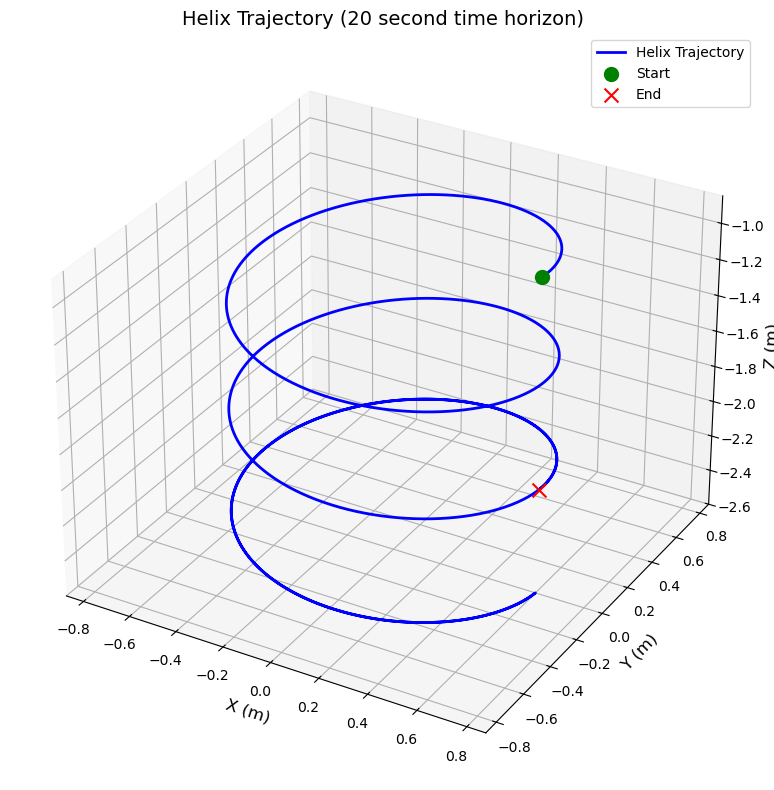

Trajectory stats over 20.0s:
  X range: [-0.600, 0.600] m
  Y range: [-0.600, 0.600] m
  Z range: [-2.600, -0.850] m
  Total path length: 15.251 m


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate helix trajectory over 20 seconds
t_horizon = 20.0  # seconds
dt = 0.01  # time step
t_values = np.arange(0, t_horizon, dt)

# Compute positions
positions = np.array([get_helix_position(t, double_speed=False) for t in t_values])
x_vals = positions[:, 0]
y_vals = positions[:, 1]
z_vals = positions[:, 2]

# Create 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the helix
ax.plot(x_vals, y_vals, z_vals, 'b-', linewidth=2, label='Helix Trajectory')

# Mark start and end points
ax.scatter(x_vals[0], y_vals[0], z_vals[0], color='green', s=100, label='Start', marker='o')
ax.scatter(x_vals[-1], y_vals[-1], z_vals[-1], color='red', s=100, label='End', marker='x')

# Labels and title
ax.set_xlabel('X (m)', fontsize=12)
ax.set_ylabel('Y (m)', fontsize=12)
ax.set_zlabel('Z (m)', fontsize=12)
ax.set_title(f'Helix Trajectory (20 second time horizon)', fontsize=14)
ax.legend()
ax.grid(True)

# Set equal aspect ratio for better visualization
max_range = np.array([x_vals.max()-x_vals.min(), 
                       y_vals.max()-y_vals.min(), 
                       z_vals.max()-z_vals.min()]).max() / 2.0

mid_x = (x_vals.max()+x_vals.min()) * 0.5
mid_y = (y_vals.max()+y_vals.min()) * 0.5
mid_z = (z_vals.max()+z_vals.min()) * 0.5

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

plt.tight_layout()
plt.show()

print(f"Trajectory stats over {t_horizon}s:")
print(f"  X range: [{x_vals.min():.3f}, {x_vals.max():.3f}] m")
print(f"  Y range: [{y_vals.min():.3f}, {y_vals.max():.3f}] m")
print(f"  Z range: [{z_vals.min():.3f}, {z_vals.max():.3f}] m")
print(f"  Total path length: {np.sum(np.sqrt(np.diff(x_vals)**2 + np.diff(y_vals)**2 + np.diff(z_vals)**2)):.3f} m")